# UK Local Authorities

In [1]:
import pandas as pd
import re


# the following html is copied from:
# https://coronavirus.data.gov.uk/details/cases?areaType=region&areaName=London
html = '''<div class=" css-1uvt8ni-menu"><div class=" css-11unzgr"><div class=" css-1oyqmqq-option" id="react-select-17-option-0" tabindex="-1">Aberdeen City</div><div class=" css-oxwjf8-option" id="react-select-17-option-1" tabindex="-1">Aberdeenshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-2" tabindex="-1">Adur</div><div class=" css-oxwjf8-option" id="react-select-17-option-3" tabindex="-1">Allerdale</div><div class=" css-oxwjf8-option" id="react-select-17-option-4" tabindex="-1">Amber Valley</div><div class=" css-oxwjf8-option" id="react-select-17-option-5" tabindex="-1">Angus</div><div class=" css-oxwjf8-option" id="react-select-17-option-6" tabindex="-1">Antrim and Newtownabbey</div><div class=" css-oxwjf8-option" id="react-select-17-option-7" tabindex="-1">Ards and North Down</div><div class=" css-oxwjf8-option" id="react-select-17-option-8" tabindex="-1">Argyll and Bute</div><div class=" css-oxwjf8-option" id="react-select-17-option-9" tabindex="-1">Armagh City, Banbridge and Craigavon</div><div class=" css-oxwjf8-option" id="react-select-17-option-10" tabindex="-1">Arun</div><div class=" css-oxwjf8-option" id="react-select-17-option-11" tabindex="-1">Ashfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-12" tabindex="-1">Ashford</div><div class=" css-oxwjf8-option" id="react-select-17-option-13" tabindex="-1">Aylesbury Vale</div><div class=" css-oxwjf8-option" id="react-select-17-option-14" tabindex="-1">Babergh</div><div class=" css-oxwjf8-option" id="react-select-17-option-15" tabindex="-1">Barking and Dagenham</div><div class=" css-oxwjf8-option" id="react-select-17-option-16" tabindex="-1">Barnet</div><div class=" css-oxwjf8-option" id="react-select-17-option-17" tabindex="-1">Barnsley</div><div class=" css-oxwjf8-option" id="react-select-17-option-18" tabindex="-1">Barrow-in-Furness</div><div class=" css-oxwjf8-option" id="react-select-17-option-19" tabindex="-1">Basildon</div><div class=" css-oxwjf8-option" id="react-select-17-option-20" tabindex="-1">Basingstoke and Deane</div><div class=" css-oxwjf8-option" id="react-select-17-option-21" tabindex="-1">Bassetlaw</div><div class=" css-oxwjf8-option" id="react-select-17-option-22" tabindex="-1">Bath and North East Somerset</div><div class=" css-oxwjf8-option" id="react-select-17-option-23" tabindex="-1">Bedford</div><div class=" css-oxwjf8-option" id="react-select-17-option-24" tabindex="-1">Belfast</div><div class=" css-oxwjf8-option" id="react-select-17-option-25" tabindex="-1">Bexley</div><div class=" css-oxwjf8-option" id="react-select-17-option-26" tabindex="-1">Birmingham</div><div class=" css-oxwjf8-option" id="react-select-17-option-27" tabindex="-1">Blaby</div><div class=" css-oxwjf8-option" id="react-select-17-option-28" tabindex="-1">Blackburn with Darwen</div><div class=" css-oxwjf8-option" id="react-select-17-option-29" tabindex="-1">Blackpool</div><div class=" css-oxwjf8-option" id="react-select-17-option-30" tabindex="-1">Blaenau Gwent</div><div class=" css-oxwjf8-option" id="react-select-17-option-31" tabindex="-1">Bolsover</div><div class=" css-oxwjf8-option" id="react-select-17-option-32" tabindex="-1">Bolton</div><div class=" css-oxwjf8-option" id="react-select-17-option-33" tabindex="-1">Boston</div><div class=" css-oxwjf8-option" id="react-select-17-option-34" tabindex="-1">Bournemouth, Christchurch and Poole</div><div class=" css-oxwjf8-option" id="react-select-17-option-35" tabindex="-1">Bracknell Forest</div><div class=" css-oxwjf8-option" id="react-select-17-option-36" tabindex="-1">Bradford</div><div class=" css-oxwjf8-option" id="react-select-17-option-37" tabindex="-1">Braintree</div><div class=" css-oxwjf8-option" id="react-select-17-option-38" tabindex="-1">Breckland</div><div class=" css-oxwjf8-option" id="react-select-17-option-39" tabindex="-1">Brent</div><div class=" css-oxwjf8-option" id="react-select-17-option-40" tabindex="-1">Brentwood</div><div class=" css-oxwjf8-option" id="react-select-17-option-41" tabindex="-1">Bridgend</div><div class=" css-oxwjf8-option" id="react-select-17-option-42" tabindex="-1">Brighton and Hove</div><div class=" css-oxwjf8-option" id="react-select-17-option-43" tabindex="-1">Bristol, City of</div><div class=" css-oxwjf8-option" id="react-select-17-option-44" tabindex="-1">Broadland</div><div class=" css-oxwjf8-option" id="react-select-17-option-45" tabindex="-1">Bromley</div><div class=" css-oxwjf8-option" id="react-select-17-option-46" tabindex="-1">Bromsgrove</div><div class=" css-oxwjf8-option" id="react-select-17-option-47" tabindex="-1">Broxbourne</div><div class=" css-oxwjf8-option" id="react-select-17-option-48" tabindex="-1">Broxtowe</div><div class=" css-oxwjf8-option" id="react-select-17-option-49" tabindex="-1">Buckinghamshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-50" tabindex="-1">Burnley</div><div class=" css-oxwjf8-option" id="react-select-17-option-51" tabindex="-1">Bury</div><div class=" css-oxwjf8-option" id="react-select-17-option-52" tabindex="-1">Caerphilly</div><div class=" css-oxwjf8-option" id="react-select-17-option-53" tabindex="-1">Calderdale</div><div class=" css-oxwjf8-option" id="react-select-17-option-54" tabindex="-1">Cambridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-55" tabindex="-1">Cambridgeshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-56" tabindex="-1">Camden</div><div class=" css-oxwjf8-option" id="react-select-17-option-57" tabindex="-1">Cannock Chase</div><div class=" css-oxwjf8-option" id="react-select-17-option-58" tabindex="-1">Canterbury</div><div class=" css-oxwjf8-option" id="react-select-17-option-59" tabindex="-1">Cardiff</div><div class=" css-oxwjf8-option" id="react-select-17-option-60" tabindex="-1">Carlisle</div><div class=" css-oxwjf8-option" id="react-select-17-option-61" tabindex="-1">Carmarthenshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-62" tabindex="-1">Castle Point</div><div class=" css-oxwjf8-option" id="react-select-17-option-63" tabindex="-1">Causeway Coast and Glens</div><div class=" css-oxwjf8-option" id="react-select-17-option-64" tabindex="-1">Central Bedfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-65" tabindex="-1">Ceredigion</div><div class=" css-oxwjf8-option" id="react-select-17-option-66" tabindex="-1">Charnwood</div><div class=" css-oxwjf8-option" id="react-select-17-option-67" tabindex="-1">Chelmsford</div><div class=" css-oxwjf8-option" id="react-select-17-option-68" tabindex="-1">Cheltenham</div><div class=" css-oxwjf8-option" id="react-select-17-option-69" tabindex="-1">Cherwell</div><div class=" css-oxwjf8-option" id="react-select-17-option-70" tabindex="-1">Cheshire East</div><div class=" css-oxwjf8-option" id="react-select-17-option-71" tabindex="-1">Cheshire West and Chester</div><div class=" css-oxwjf8-option" id="react-select-17-option-72" tabindex="-1">Chesterfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-73" tabindex="-1">Chichester</div><div class=" css-oxwjf8-option" id="react-select-17-option-74" tabindex="-1">Chiltern</div><div class=" css-oxwjf8-option" id="react-select-17-option-75" tabindex="-1">Chorley</div><div class=" css-oxwjf8-option" id="react-select-17-option-76" tabindex="-1">City of Edinburgh</div><div class=" css-oxwjf8-option" id="react-select-17-option-77" tabindex="-1">City of London</div><div class=" css-oxwjf8-option" id="react-select-17-option-78" tabindex="-1">Clackmannanshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-79" tabindex="-1">Colchester</div><div class=" css-oxwjf8-option" id="react-select-17-option-80" tabindex="-1">Comhairle nan Eilean Siar</div><div class=" css-oxwjf8-option" id="react-select-17-option-81" tabindex="-1">Conwy</div><div class=" css-oxwjf8-option" id="react-select-17-option-82" tabindex="-1">Copeland</div><div class=" css-oxwjf8-option" id="react-select-17-option-83" tabindex="-1">Corby</div><div class=" css-oxwjf8-option" id="react-select-17-option-84" tabindex="-1">Cornwall and Isles of Scilly</div><div class=" css-oxwjf8-option" id="react-select-17-option-85" tabindex="-1">Cotswold</div><div class=" css-oxwjf8-option" id="react-select-17-option-86" tabindex="-1">County Durham</div><div class=" css-oxwjf8-option" id="react-select-17-option-87" tabindex="-1">Coventry</div><div class=" css-oxwjf8-option" id="react-select-17-option-88" tabindex="-1">Craven</div><div class=" css-oxwjf8-option" id="react-select-17-option-89" tabindex="-1">Crawley</div><div class=" css-oxwjf8-option" id="react-select-17-option-90" tabindex="-1">Croydon</div><div class=" css-oxwjf8-option" id="react-select-17-option-91" tabindex="-1">Cumbria</div><div class=" css-oxwjf8-option" id="react-select-17-option-92" tabindex="-1">Dacorum</div><div class=" css-oxwjf8-option" id="react-select-17-option-93" tabindex="-1">Darlington</div><div class=" css-oxwjf8-option" id="react-select-17-option-94" tabindex="-1">Dartford</div><div class=" css-oxwjf8-option" id="react-select-17-option-95" tabindex="-1">Daventry</div><div class=" css-oxwjf8-option" id="react-select-17-option-96" tabindex="-1">Denbighshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-97" tabindex="-1">Derby</div><div class=" css-oxwjf8-option" id="react-select-17-option-98" tabindex="-1">Derbyshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-99" tabindex="-1">Derbyshire Dales</div><div class=" css-oxwjf8-option" id="react-select-17-option-100" tabindex="-1">Derry City and Strabane</div><div class=" css-oxwjf8-option" id="react-select-17-option-101" tabindex="-1">Devon</div><div class=" css-oxwjf8-option" id="react-select-17-option-102" tabindex="-1">Doncaster</div><div class=" css-oxwjf8-option" id="react-select-17-option-103" tabindex="-1">Dorset</div><div class=" css-oxwjf8-option" id="react-select-17-option-104" tabindex="-1">Dover</div><div class=" css-oxwjf8-option" id="react-select-17-option-105" tabindex="-1">Dudley</div><div class=" css-oxwjf8-option" id="react-select-17-option-106" tabindex="-1">Dumfries and Galloway</div><div class=" css-oxwjf8-option" id="react-select-17-option-107" tabindex="-1">Dundee City</div><div class=" css-oxwjf8-option" id="react-select-17-option-108" tabindex="-1">Ealing</div><div class=" css-oxwjf8-option" id="react-select-17-option-109" tabindex="-1">East Ayrshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-110" tabindex="-1">Eastbourne</div><div class=" css-oxwjf8-option" id="react-select-17-option-111" tabindex="-1">East Cambridgeshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-112" tabindex="-1">East Devon</div><div class=" css-oxwjf8-option" id="react-select-17-option-113" tabindex="-1">East Dunbartonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-114" tabindex="-1">East Hampshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-115" tabindex="-1">East Hertfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-116" tabindex="-1">Eastleigh</div><div class=" css-oxwjf8-option" id="react-select-17-option-117" tabindex="-1">East Lindsey</div><div class=" css-oxwjf8-option" id="react-select-17-option-118" tabindex="-1">East Lothian</div><div class=" css-oxwjf8-option" id="react-select-17-option-119" tabindex="-1">East Northamptonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-120" tabindex="-1">East Renfrewshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-121" tabindex="-1">East Riding of Yorkshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-122" tabindex="-1">East Staffordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-123" tabindex="-1">East Suffolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-124" tabindex="-1">East Sussex</div><div class=" css-oxwjf8-option" id="react-select-17-option-125" tabindex="-1">Eden</div><div class=" css-oxwjf8-option" id="react-select-17-option-126" tabindex="-1">Elmbridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-127" tabindex="-1">Enfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-128" tabindex="-1">Epping Forest</div><div class=" css-oxwjf8-option" id="react-select-17-option-129" tabindex="-1">Epsom and Ewell</div><div class=" css-oxwjf8-option" id="react-select-17-option-130" tabindex="-1">Erewash</div><div class=" css-oxwjf8-option" id="react-select-17-option-131" tabindex="-1">Essex</div><div class=" css-oxwjf8-option" id="react-select-17-option-132" tabindex="-1">Exeter</div><div class=" css-oxwjf8-option" id="react-select-17-option-133" tabindex="-1">Falkirk</div><div class=" css-oxwjf8-option" id="react-select-17-option-134" tabindex="-1">Fareham</div><div class=" css-oxwjf8-option" id="react-select-17-option-135" tabindex="-1">Fenland</div><div class=" css-oxwjf8-option" id="react-select-17-option-136" tabindex="-1">Fermanagh and Omagh</div><div class=" css-oxwjf8-option" id="react-select-17-option-137" tabindex="-1">Fife</div><div class=" css-oxwjf8-option" id="react-select-17-option-138" tabindex="-1">Flintshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-139" tabindex="-1">Folkestone and Hythe</div><div class=" css-oxwjf8-option" id="react-select-17-option-140" tabindex="-1">Forest of Dean</div><div class=" css-oxwjf8-option" id="react-select-17-option-141" tabindex="-1">Fylde</div><div class=" css-oxwjf8-option" id="react-select-17-option-142" tabindex="-1">Gateshead</div><div class=" css-oxwjf8-option" id="react-select-17-option-143" tabindex="-1">Gedling</div><div class=" css-oxwjf8-option" id="react-select-17-option-144" tabindex="-1">Glasgow City</div><div class=" css-oxwjf8-option" id="react-select-17-option-145" tabindex="-1">Gloucester</div><div class=" css-oxwjf8-option" id="react-select-17-option-146" tabindex="-1">Gloucestershire</div><div class=" css-oxwjf8-option" id="react-select-17-option-147" tabindex="-1">Gosport</div><div class=" css-oxwjf8-option" id="react-select-17-option-148" tabindex="-1">Gravesham</div><div class=" css-oxwjf8-option" id="react-select-17-option-149" tabindex="-1">Great Yarmouth</div><div class=" css-oxwjf8-option" id="react-select-17-option-150" tabindex="-1">Greenwich</div><div class=" css-oxwjf8-option" id="react-select-17-option-151" tabindex="-1">Guildford</div><div class=" css-oxwjf8-option" id="react-select-17-option-152" tabindex="-1">Gwynedd</div><div class=" css-oxwjf8-option" id="react-select-17-option-153" tabindex="-1">Hackney and City of London</div><div class=" css-oxwjf8-option" id="react-select-17-option-154" tabindex="-1">Halton</div><div class=" css-oxwjf8-option" id="react-select-17-option-155" tabindex="-1">Hambleton</div><div class=" css-oxwjf8-option" id="react-select-17-option-156" tabindex="-1">Hammersmith and Fulham</div><div class=" css-oxwjf8-option" id="react-select-17-option-157" tabindex="-1">Hampshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-158" tabindex="-1">Harborough</div><div class=" css-oxwjf8-option" id="react-select-17-option-159" tabindex="-1">Haringey</div><div class=" css-oxwjf8-option" id="react-select-17-option-160" tabindex="-1">Harlow</div><div class=" css-oxwjf8-option" id="react-select-17-option-161" tabindex="-1">Harrogate</div><div class=" css-oxwjf8-option" id="react-select-17-option-162" tabindex="-1">Harrow</div><div class=" css-oxwjf8-option" id="react-select-17-option-163" tabindex="-1">Hart</div><div class=" css-oxwjf8-option" id="react-select-17-option-164" tabindex="-1">Hartlepool</div><div class=" css-oxwjf8-option" id="react-select-17-option-165" tabindex="-1">Hastings</div><div class=" css-oxwjf8-option" id="react-select-17-option-166" tabindex="-1">Havant</div><div class=" css-oxwjf8-option" id="react-select-17-option-167" tabindex="-1">Havering</div><div class=" css-oxwjf8-option" id="react-select-17-option-168" tabindex="-1">Herefordshire, County of</div><div class=" css-oxwjf8-option" id="react-select-17-option-169" tabindex="-1">Hertfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-170" tabindex="-1">Hertsmere</div><div class=" css-oxwjf8-option" id="react-select-17-option-171" tabindex="-1">Highland</div><div class=" css-oxwjf8-option" id="react-select-17-option-172" tabindex="-1">High Peak</div><div class=" css-oxwjf8-option" id="react-select-17-option-173" tabindex="-1">Hillingdon</div><div class=" css-oxwjf8-option" id="react-select-17-option-174" tabindex="-1">Hinckley and Bosworth</div><div class=" css-oxwjf8-option" id="react-select-17-option-175" tabindex="-1">Horsham</div><div class=" css-oxwjf8-option" id="react-select-17-option-176" tabindex="-1">Hounslow</div><div class=" css-oxwjf8-option" id="react-select-17-option-177" tabindex="-1">Huntingdonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-178" tabindex="-1">Hyndburn</div><div class=" css-oxwjf8-option" id="react-select-17-option-179" tabindex="-1">Inverclyde</div><div class=" css-oxwjf8-option" id="react-select-17-option-180" tabindex="-1">Ipswich</div><div class=" css-oxwjf8-option" id="react-select-17-option-181" tabindex="-1">Isle of Anglesey</div><div class=" css-oxwjf8-option" id="react-select-17-option-182" tabindex="-1">Isle of Wight</div><div class=" css-oxwjf8-option" id="react-select-17-option-183" tabindex="-1">Isles of Scilly</div><div class=" css-oxwjf8-option" id="react-select-17-option-184" tabindex="-1">Islington</div><div class=" css-oxwjf8-option" id="react-select-17-option-185" tabindex="-1">Kensington and Chelsea</div><div class=" css-oxwjf8-option" id="react-select-17-option-186" tabindex="-1">Kent</div><div class=" css-oxwjf8-option" id="react-select-17-option-187" tabindex="-1">Kettering</div><div class=" css-oxwjf8-option" id="react-select-17-option-188" tabindex="-1">King's Lynn and West Norfolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-189" tabindex="-1">Kingston upon Hull, City of</div><div class=" css-oxwjf8-option" id="react-select-17-option-190" tabindex="-1">Kingston upon Thames</div><div class=" css-oxwjf8-option" id="react-select-17-option-191" tabindex="-1">Kirklees</div><div class=" css-oxwjf8-option" id="react-select-17-option-192" tabindex="-1">Knowsley</div><div class=" css-oxwjf8-option" id="react-select-17-option-193" tabindex="-1">Lambeth</div><div class=" css-oxwjf8-option" id="react-select-17-option-194" tabindex="-1">Lancashire</div><div class=" css-oxwjf8-option" id="react-select-17-option-195" tabindex="-1">Lancaster</div><div class=" css-oxwjf8-option" id="react-select-17-option-196" tabindex="-1">Leeds</div><div class=" css-oxwjf8-option" id="react-select-17-option-197" tabindex="-1">Leicester</div><div class=" css-oxwjf8-option" id="react-select-17-option-198" tabindex="-1">Leicestershire</div><div class=" css-oxwjf8-option" id="react-select-17-option-199" tabindex="-1">Lewes</div><div class=" css-oxwjf8-option" id="react-select-17-option-200" tabindex="-1">Lewisham</div><div class=" css-oxwjf8-option" id="react-select-17-option-201" tabindex="-1">Lichfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-202" tabindex="-1">Lincoln</div><div class=" css-oxwjf8-option" id="react-select-17-option-203" tabindex="-1">Lincolnshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-204" tabindex="-1">Lisburn and Castlereagh</div><div class=" css-oxwjf8-option" id="react-select-17-option-205" tabindex="-1">Liverpool</div><div class=" css-oxwjf8-option" id="react-select-17-option-206" tabindex="-1">Luton</div><div class=" css-oxwjf8-option" id="react-select-17-option-207" tabindex="-1">Maidstone</div><div class=" css-oxwjf8-option" id="react-select-17-option-208" tabindex="-1">Maldon</div><div class=" css-oxwjf8-option" id="react-select-17-option-209" tabindex="-1">Malvern Hills</div><div class=" css-oxwjf8-option" id="react-select-17-option-210" tabindex="-1">Manchester</div><div class=" css-oxwjf8-option" id="react-select-17-option-211" tabindex="-1">Mansfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-212" tabindex="-1">Medway</div><div class=" css-oxwjf8-option" id="react-select-17-option-213" tabindex="-1">Melton</div><div class=" css-oxwjf8-option" id="react-select-17-option-214" tabindex="-1">Mendip</div><div class=" css-oxwjf8-option" id="react-select-17-option-215" tabindex="-1">Merthyr Tydfil</div><div class=" css-oxwjf8-option" id="react-select-17-option-216" tabindex="-1">Merton</div><div class=" css-oxwjf8-option" id="react-select-17-option-217" tabindex="-1">Mid and East Antrim</div><div class=" css-oxwjf8-option" id="react-select-17-option-218" tabindex="-1">Mid Devon</div><div class=" css-oxwjf8-option" id="react-select-17-option-219" tabindex="-1">Middlesbrough</div><div class=" css-oxwjf8-option" id="react-select-17-option-220" tabindex="-1">Midlothian</div><div class=" css-oxwjf8-option" id="react-select-17-option-221" tabindex="-1">Mid Suffolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-222" tabindex="-1">Mid Sussex</div><div class=" css-oxwjf8-option" id="react-select-17-option-223" tabindex="-1">Mid Ulster</div><div class=" css-oxwjf8-option" id="react-select-17-option-224" tabindex="-1">Milton Keynes</div><div class=" css-oxwjf8-option" id="react-select-17-option-225" tabindex="-1">Mole Valley</div><div class=" css-oxwjf8-option" id="react-select-17-option-226" tabindex="-1">Monmouthshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-227" tabindex="-1">Moray</div><div class=" css-oxwjf8-option" id="react-select-17-option-228" tabindex="-1">Na h-Eileanan Siar</div><div class=" css-oxwjf8-option" id="react-select-17-option-229" tabindex="-1">Neath Port Talbot</div><div class=" css-oxwjf8-option" id="react-select-17-option-230" tabindex="-1">Newark and Sherwood</div><div class=" css-oxwjf8-option" id="react-select-17-option-231" tabindex="-1">Newcastle-under-Lyme</div><div class=" css-oxwjf8-option" id="react-select-17-option-232" tabindex="-1">Newcastle upon Tyne</div><div class=" css-oxwjf8-option" id="react-select-17-option-233" tabindex="-1">New Forest</div><div class=" css-oxwjf8-option" id="react-select-17-option-234" tabindex="-1">Newham</div><div class=" css-oxwjf8-option" id="react-select-17-option-235" tabindex="-1">Newport</div><div class=" css-oxwjf8-option" id="react-select-17-option-236" tabindex="-1">Newry, Mourne and Down</div><div class=" css-oxwjf8-option" id="react-select-17-option-237" tabindex="-1">Norfolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-238" tabindex="-1">Northampton</div><div class=" css-oxwjf8-option" id="react-select-17-option-239" tabindex="-1">Northamptonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-240" tabindex="-1">North Ayrshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-241" tabindex="-1">North Devon</div><div class=" css-oxwjf8-option" id="react-select-17-option-242" tabindex="-1">North East Derbyshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-243" tabindex="-1">North East Lincolnshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-244" tabindex="-1">North Hertfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-245" tabindex="-1">North Kesteven</div><div class=" css-oxwjf8-option" id="react-select-17-option-246" tabindex="-1">North Lanarkshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-247" tabindex="-1">North Lincolnshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-248" tabindex="-1">North Norfolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-249" tabindex="-1">North Somerset</div><div class=" css-oxwjf8-option" id="react-select-17-option-250" tabindex="-1">North Tyneside</div><div class=" css-oxwjf8-option" id="react-select-17-option-251" tabindex="-1">Northumberland</div><div class=" css-oxwjf8-option" id="react-select-17-option-252" tabindex="-1">North Warwickshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-253" tabindex="-1">North West Leicestershire</div><div class=" css-oxwjf8-option" id="react-select-17-option-254" tabindex="-1">North Yorkshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-255" tabindex="-1">Norwich</div><div class=" css-oxwjf8-option" id="react-select-17-option-256" tabindex="-1">Nottingham</div><div class=" css-oxwjf8-option" id="react-select-17-option-257" tabindex="-1">Nottinghamshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-258" tabindex="-1">Nuneaton and Bedworth</div><div class=" css-oxwjf8-option" id="react-select-17-option-259" tabindex="-1">Oadby and Wigston</div><div class=" css-oxwjf8-option" id="react-select-17-option-260" tabindex="-1">Oldham</div><div class=" css-oxwjf8-option" id="react-select-17-option-261" tabindex="-1">Orkney Islands</div><div class=" css-oxwjf8-option" id="react-select-17-option-262" tabindex="-1">Oxford</div><div class=" css-oxwjf8-option" id="react-select-17-option-263" tabindex="-1">Oxfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-264" tabindex="-1">Pembrokeshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-265" tabindex="-1">Pendle</div><div class=" css-oxwjf8-option" id="react-select-17-option-266" tabindex="-1">Perth and Kinross</div><div class=" css-oxwjf8-option" id="react-select-17-option-267" tabindex="-1">Peterborough</div><div class=" css-oxwjf8-option" id="react-select-17-option-268" tabindex="-1">Plymouth</div><div class=" css-oxwjf8-option" id="react-select-17-option-269" tabindex="-1">Portsmouth</div><div class=" css-oxwjf8-option" id="react-select-17-option-270" tabindex="-1">Powys</div><div class=" css-oxwjf8-option" id="react-select-17-option-271" tabindex="-1">Preston</div><div class=" css-oxwjf8-option" id="react-select-17-option-272" tabindex="-1">Reading</div><div class=" css-oxwjf8-option" id="react-select-17-option-273" tabindex="-1">Redbridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-274" tabindex="-1">Redcar and Cleveland</div><div class=" css-oxwjf8-option" id="react-select-17-option-275" tabindex="-1">Redditch</div><div class=" css-oxwjf8-option" id="react-select-17-option-276" tabindex="-1">Reigate and Banstead</div><div class=" css-oxwjf8-option" id="react-select-17-option-277" tabindex="-1">Renfrewshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-278" tabindex="-1">Rhondda Cynon Taf</div><div class=" css-oxwjf8-option" id="react-select-17-option-279" tabindex="-1">Ribble Valley</div><div class=" css-oxwjf8-option" id="react-select-17-option-280" tabindex="-1">Richmondshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-281" tabindex="-1">Richmond upon Thames</div><div class=" css-oxwjf8-option" id="react-select-17-option-282" tabindex="-1">Rochdale</div><div class=" css-oxwjf8-option" id="react-select-17-option-283" tabindex="-1">Rochford</div><div class=" css-oxwjf8-option" id="react-select-17-option-284" tabindex="-1">Rossendale</div><div class=" css-oxwjf8-option" id="react-select-17-option-285" tabindex="-1">Rother</div><div class=" css-oxwjf8-option" id="react-select-17-option-286" tabindex="-1">Rotherham</div><div class=" css-oxwjf8-option" id="react-select-17-option-287" tabindex="-1">Rugby</div><div class=" css-oxwjf8-option" id="react-select-17-option-288" tabindex="-1">Runnymede</div><div class=" css-oxwjf8-option" id="react-select-17-option-289" tabindex="-1">Rushcliffe</div><div class=" css-oxwjf8-option" id="react-select-17-option-290" tabindex="-1">Rushmoor</div><div class=" css-oxwjf8-option" id="react-select-17-option-291" tabindex="-1">Rutland</div><div class=" css-oxwjf8-option" id="react-select-17-option-292" tabindex="-1">Ryedale</div><div class=" css-oxwjf8-option" id="react-select-17-option-293" tabindex="-1">Salford</div><div class=" css-oxwjf8-option" id="react-select-17-option-294" tabindex="-1">Sandwell</div><div class=" css-oxwjf8-option" id="react-select-17-option-295" tabindex="-1">Scarborough</div><div class=" css-oxwjf8-option" id="react-select-17-option-296" tabindex="-1">Scottish Borders</div><div class=" css-oxwjf8-option" id="react-select-17-option-297" tabindex="-1">Sedgemoor</div><div class=" css-oxwjf8-option" id="react-select-17-option-298" tabindex="-1">Sefton</div><div class=" css-oxwjf8-option" id="react-select-17-option-299" tabindex="-1">Selby</div><div class=" css-oxwjf8-option" id="react-select-17-option-300" tabindex="-1">Sevenoaks</div><div class=" css-oxwjf8-option" id="react-select-17-option-301" tabindex="-1">Sheffield</div><div class=" css-oxwjf8-option" id="react-select-17-option-302" tabindex="-1">Shetland Islands</div><div class=" css-oxwjf8-option" id="react-select-17-option-303" tabindex="-1">Shropshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-304" tabindex="-1">Slough</div><div class=" css-oxwjf8-option" id="react-select-17-option-305" tabindex="-1">Solihull</div><div class=" css-oxwjf8-option" id="react-select-17-option-306" tabindex="-1">Somerset</div><div class=" css-oxwjf8-option" id="react-select-17-option-307" tabindex="-1">Somerset West and Taunton</div><div class=" css-oxwjf8-option" id="react-select-17-option-308" tabindex="-1">Southampton</div><div class=" css-oxwjf8-option" id="react-select-17-option-309" tabindex="-1">South Ayrshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-310" tabindex="-1">South Bucks</div><div class=" css-oxwjf8-option" id="react-select-17-option-311" tabindex="-1">South Cambridgeshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-312" tabindex="-1">South Derbyshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-313" tabindex="-1">Southend-on-Sea</div><div class=" css-oxwjf8-option" id="react-select-17-option-314" tabindex="-1">South Gloucestershire</div><div class=" css-oxwjf8-option" id="react-select-17-option-315" tabindex="-1">South Hams</div><div class=" css-oxwjf8-option" id="react-select-17-option-316" tabindex="-1">South Holland</div><div class=" css-oxwjf8-option" id="react-select-17-option-317" tabindex="-1">South Kesteven</div><div class=" css-oxwjf8-option" id="react-select-17-option-318" tabindex="-1">South Lakeland</div><div class=" css-oxwjf8-option" id="react-select-17-option-319" tabindex="-1">South Lanarkshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-320" tabindex="-1">South Norfolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-321" tabindex="-1">South Northamptonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-322" tabindex="-1">South Oxfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-323" tabindex="-1">South Ribble</div><div class=" css-oxwjf8-option" id="react-select-17-option-324" tabindex="-1">South Somerset</div><div class=" css-oxwjf8-option" id="react-select-17-option-325" tabindex="-1">South Staffordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-326" tabindex="-1">South Tyneside</div><div class=" css-oxwjf8-option" id="react-select-17-option-327" tabindex="-1">Southwark</div><div class=" css-oxwjf8-option" id="react-select-17-option-328" tabindex="-1">Spelthorne</div><div class=" css-oxwjf8-option" id="react-select-17-option-329" tabindex="-1">Stafford</div><div class=" css-oxwjf8-option" id="react-select-17-option-330" tabindex="-1">Staffordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-331" tabindex="-1">Staffordshire Moorlands</div><div class=" css-oxwjf8-option" id="react-select-17-option-332" tabindex="-1">St Albans</div><div class=" css-oxwjf8-option" id="react-select-17-option-333" tabindex="-1">Stevenage</div><div class=" css-oxwjf8-option" id="react-select-17-option-334" tabindex="-1">St. Helens</div><div class=" css-oxwjf8-option" id="react-select-17-option-335" tabindex="-1">Stirling</div><div class=" css-oxwjf8-option" id="react-select-17-option-336" tabindex="-1">Stockport</div><div class=" css-oxwjf8-option" id="react-select-17-option-337" tabindex="-1">Stockton-on-Tees</div><div class=" css-oxwjf8-option" id="react-select-17-option-338" tabindex="-1">Stoke-on-Trent</div><div class=" css-oxwjf8-option" id="react-select-17-option-339" tabindex="-1">Stratford-on-Avon</div><div class=" css-oxwjf8-option" id="react-select-17-option-340" tabindex="-1">Stroud</div><div class=" css-oxwjf8-option" id="react-select-17-option-341" tabindex="-1">Suffolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-342" tabindex="-1">Sunderland</div><div class=" css-oxwjf8-option" id="react-select-17-option-343" tabindex="-1">Surrey</div><div class=" css-oxwjf8-option" id="react-select-17-option-344" tabindex="-1">Surrey Heath</div><div class=" css-oxwjf8-option" id="react-select-17-option-345" tabindex="-1">Sutton</div><div class=" css-oxwjf8-option" id="react-select-17-option-346" tabindex="-1">Swale</div><div class=" css-oxwjf8-option" id="react-select-17-option-347" tabindex="-1">Swansea</div><div class=" css-oxwjf8-option" id="react-select-17-option-348" tabindex="-1">Swindon</div><div class=" css-oxwjf8-option" id="react-select-17-option-349" tabindex="-1">Tameside</div><div class=" css-oxwjf8-option" id="react-select-17-option-350" tabindex="-1">Tamworth</div><div class=" css-oxwjf8-option" id="react-select-17-option-351" tabindex="-1">Tandridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-352" tabindex="-1">Teignbridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-353" tabindex="-1">Telford and Wrekin</div><div class=" css-oxwjf8-option" id="react-select-17-option-354" tabindex="-1">Tendring</div><div class=" css-oxwjf8-option" id="react-select-17-option-355" tabindex="-1">Test Valley</div><div class=" css-oxwjf8-option" id="react-select-17-option-356" tabindex="-1">Tewkesbury</div><div class=" css-oxwjf8-option" id="react-select-17-option-357" tabindex="-1">Thanet</div><div class=" css-oxwjf8-option" id="react-select-17-option-358" tabindex="-1">Three Rivers</div><div class=" css-oxwjf8-option" id="react-select-17-option-359" tabindex="-1">Thurrock</div><div class=" css-oxwjf8-option" id="react-select-17-option-360" tabindex="-1">Tonbridge and Malling</div><div class=" css-oxwjf8-option" id="react-select-17-option-361" tabindex="-1">Torbay</div><div class=" css-oxwjf8-option" id="react-select-17-option-362" tabindex="-1">Torfaen</div><div class=" css-oxwjf8-option" id="react-select-17-option-363" tabindex="-1">Torridge</div><div class=" css-oxwjf8-option" id="react-select-17-option-364" tabindex="-1">Tower Hamlets</div><div class=" css-oxwjf8-option" id="react-select-17-option-365" tabindex="-1">Trafford</div><div class=" css-oxwjf8-option" id="react-select-17-option-366" tabindex="-1">Tunbridge Wells</div><div class=" css-oxwjf8-option" id="react-select-17-option-367" tabindex="-1">Uttlesford</div><div class=" css-oxwjf8-option" id="react-select-17-option-368" tabindex="-1">Vale of Glamorgan</div><div class=" css-oxwjf8-option" id="react-select-17-option-369" tabindex="-1">Vale of White Horse</div><div class=" css-oxwjf8-option" id="react-select-17-option-370" tabindex="-1">Wakefield</div><div class=" css-oxwjf8-option" id="react-select-17-option-371" tabindex="-1">Walsall</div><div class=" css-oxwjf8-option" id="react-select-17-option-372" tabindex="-1">Waltham Forest</div><div class=" css-oxwjf8-option" id="react-select-17-option-373" tabindex="-1">Wandsworth</div><div class=" css-oxwjf8-option" id="react-select-17-option-374" tabindex="-1">Warrington</div><div class=" css-oxwjf8-option" id="react-select-17-option-375" tabindex="-1">Warwick</div><div class=" css-oxwjf8-option" id="react-select-17-option-376" tabindex="-1">Warwickshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-377" tabindex="-1">Watford</div><div class=" css-oxwjf8-option" id="react-select-17-option-378" tabindex="-1">Waverley</div><div class=" css-oxwjf8-option" id="react-select-17-option-379" tabindex="-1">Wealden</div><div class=" css-oxwjf8-option" id="react-select-17-option-380" tabindex="-1">Wellingborough</div><div class=" css-oxwjf8-option" id="react-select-17-option-381" tabindex="-1">Welwyn Hatfield</div><div class=" css-oxwjf8-option" id="react-select-17-option-382" tabindex="-1">West Berkshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-383" tabindex="-1">West Devon</div><div class=" css-oxwjf8-option" id="react-select-17-option-384" tabindex="-1">West Dunbartonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-385" tabindex="-1">West Lancashire</div><div class=" css-oxwjf8-option" id="react-select-17-option-386" tabindex="-1">West Lindsey</div><div class=" css-oxwjf8-option" id="react-select-17-option-387" tabindex="-1">West Lothian</div><div class=" css-oxwjf8-option" id="react-select-17-option-388" tabindex="-1">Westminster</div><div class=" css-oxwjf8-option" id="react-select-17-option-389" tabindex="-1">West Northamptonshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-390" tabindex="-1">West Oxfordshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-391" tabindex="-1">West Suffolk</div><div class=" css-oxwjf8-option" id="react-select-17-option-392" tabindex="-1">West Sussex</div><div class=" css-oxwjf8-option" id="react-select-17-option-393" tabindex="-1">Wigan</div><div class=" css-oxwjf8-option" id="react-select-17-option-394" tabindex="-1">Wiltshire</div><div class=" css-oxwjf8-option" id="react-select-17-option-395" tabindex="-1">Winchester</div><div class=" css-oxwjf8-option" id="react-select-17-option-396" tabindex="-1">Windsor and Maidenhead</div><div class=" css-oxwjf8-option" id="react-select-17-option-397" tabindex="-1">Wirral</div><div class=" css-oxwjf8-option" id="react-select-17-option-398" tabindex="-1">Woking</div><div class=" css-oxwjf8-option" id="react-select-17-option-399" tabindex="-1">Wokingham</div><div class=" css-oxwjf8-option" id="react-select-17-option-400" tabindex="-1">Wolverhampton</div><div class=" css-oxwjf8-option" id="react-select-17-option-401" tabindex="-1">Worcester</div><div class=" css-oxwjf8-option" id="react-select-17-option-402" tabindex="-1">Worcestershire</div><div class=" css-oxwjf8-option" id="react-select-17-option-403" tabindex="-1">Worthing</div><div class=" css-oxwjf8-option" id="react-select-17-option-404" tabindex="-1">Wrexham</div><div class=" css-oxwjf8-option" id="react-select-17-option-405" tabindex="-1">Wychavon</div><div class=" css-oxwjf8-option" id="react-select-17-option-406" tabindex="-1">Wycombe</div><div class=" css-oxwjf8-option" id="react-select-17-option-407" tabindex="-1">Wyre</div><div class=" css-oxwjf8-option" id="react-select-17-option-408" tabindex="-1">Wyre Forest</div><div class=" css-oxwjf8-option" id="react-select-17-option-409" tabindex="-1">York</div></div></div>'''


# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '!', raw_html)
    return cleantext
    
    
local_authorities = [i for i in cleanhtml(html).split('!') if i != '']

local_authorities = pd.Series(local_authorities)

local_authorities.to_clipboard()
local_authorities.to_csv('data/UK_LOCAL_AUTHORITIES.csv')
local_authorities

0      Aberdeen City
1      Aberdeenshire
2               Adur
3          Allerdale
4       Amber Valley
           ...      
405         Wychavon
406          Wycombe
407             Wyre
408      Wyre Forest
409             York
Length: 410, dtype: object

# GAME


In [2]:
import pandas as pd

path = 'raw/covid_soccer_2019-20.csv'

cols = ['url', 'schedule',
       'venue', 'teamA', 'teamB', 'teamA_score', 'teamB_score', 'winner_Team',
       'winner_score', 'venue_location', 'winner_location']

DF = pd.read_csv(path)[cols]
DF['schedule'] = pd.to_datetime(DF['schedule'])
DF19_20 = DF
# DF19_20


path = 'raw/covid_soccer_2020-21.csv'

cols = ['url', 'schedule',
       'venue', 'teamA', 'teamB', 'teamA_score', 'teamB_score', 'winner_Team',
       'winner_score', 'venue_location', 'winner_location']

DF = pd.read_csv(path)[cols]
DF['schedule'] = pd.to_datetime(DF['schedule'])
DF20_21 = DF
# DF20_21

path = 'raw/covid_soccer_2021-22.csv'

cols = ['url', 'schedule',
       'venue', 'teamA', 'teamB', 'teamA_score', 'teamB_score', 'winner_Team',
       'winner_score', 'venue_location', 'winner_location']

DF = pd.read_csv(path)[cols]
DF['schedule'] = pd.to_datetime(DF['schedule'])
DF21_22 = DF
# DF21_22

DF = pd.concat([DF19_20, DF20_21, DF21_22])
DF = DF.dropna()
DF = DF.sort_values('schedule').reset_index(drop = True)
DF

,url,schedule,venue,teamA,teamB,teamA_score,teamB_score,winner_Team,winner_score,venue_location,winner_location
0,https://www.skysports.com/football/liverpool-v...,2019-08-09 20:00:00,Anfield,Liverpool,Norwich,4.0,1.0,Liverpool,4.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England"
1,https://www.skysports.com/football/west-ham-un...,2019-08-10 12:30:00,London Stadium,West Ham,Man City,0.0,5.0,Man City,5.0,"Queen Elizabeth Olympic Park, Stratford\nLondo...",Etihad Campus\nManchester\nM11 3FF
2,https://www.skysports.com/football/watford-vs-...,2019-08-10 15:00:00,Vicarage Road,Watford,Brighton,0.0,3.0,Brighton,3.0,Vicarage Road\nWatford\nWD18 0ER,"Falmer, Brighton, East Sussex, England"
3,https://www.skysports.com/football/crystal-pal...,2019-08-10 15:00:00,Selhurst Park,C Palace,Everton,0.0,0.0,Everton,0.0,"Selhurst\nLondon, SE25\nEngland","Goodison Road\nWalton, Liverpool, England"
4,https://www.skysports.com/football/burnley-vs-...,2019-08-10 15:00:00,Turf Moor,Burnley,So'ton,3.0,0.0,Burnley,3.0,"Burnley, Lancashire, England","Burnley, Lancashire, England"
...,...,...,...,...,...,...,...,...,...,...,...
879,https://www.skysports.com/football/southampton...,2022-01-22 17:30:00,St. Mary's Stadium,So'ton,Man City,1.0,1.0,Man City,1.0,"Britannia Rd, Southampton, England",Etihad Campus\nManchester\nM11 3FF
880,https://www.skysports.com/football/leicester-c...,2022-01-23 14:00:00,The King Power Stadium,Leicester,Brighton,1.0,1.0,Brighton,1.0,Filbert Way\nLeicester\nLE2 7FL,"Falmer, Brighton, East Sussex, England"
881,https://www.skysports.com/football/crystal-pal...,2022-01-23 14:00:00,Selhurst Park,C Palace,Liverpool,1.0,3.0,Liverpool,3.0,"Selhurst\nLondon, SE25\nEngland","Anfield, Liverpool, Merseyside, England"
882,https://www.skysports.com/football/arsenal-vs-...,2022-01-23 14:00:00,Emirates Stadium,Arsenal,Burnley,0.0,0.0,Burnley,0.0,"Highbury House,\n75 Drayton Park,\nLondon, N5 ...","Burnley, Lancashire, England"


In [3]:
DF.to_csv('data/GAME_TABLE.csv', index = False)

# STADIUM

In [4]:
Stadium_List = list(DF['venue'].unique())
Stadium_List = [i.replace('The ', '').replace('.', '') for i in Stadium_List]
Stadium_List = list(set(Stadium_List))
print(len(Stadium_List))
Stadium_List.sort()
Stadium_List

24


['Amex Stadium',
 'Anfield',
 'Bramall Lane',
 'Brentford Community Stadium',
 'Carrow Road',
 'Craven Cottage',
 'Elland Road',
 'Emirates Stadium',
 'Etihad Stadium',
 'Goodison Park',
 'Hawthorns',
 'King Power Stadium',
 'London Stadium',
 'Molineux',
 'Old Trafford',
 'Selhurst Park',
 "St James' Park, Newcastle",
 "St Mary's Stadium",
 'Stamford Bridge',
 'Tottenham Hotspur Stadium',
 'Turf Moor',
 'Vicarage Road',
 'Villa Park',
 'Vitality Stadium']

In [5]:
from geopy.geocoders import Nominatim
import geopandas as gpd
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36'


L = []
for Stadium in Stadium_List:
    Stadium = Stadium.split(',')[0]
    if 'Stadium' not in Stadium and 'Park' not in Stadium:
        Stadium = Stadium + ' Stadium' 
        
    # calling the Nominatim tool
    loc = Nominatim(user_agent=user_agent)
    print(Stadium)
    # entering the location name
    getLoc = loc.geocode(Stadium)

    # printing address
    # print(getLoc.address)

    d = {}
    d['name'] = Stadium
    d['address'] = getLoc.address
    # d['geometry'] = getLoc.point
    d['Latitude'] = getLoc.latitude
    d['Longitude'] = getLoc.longitude
    
    L.append(d)
    
df = gpd.GeoDataFrame(L)
GDF = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
GDF


Amex Stadium
Anfield Stadium
Bramall Lane Stadium
Brentford Community Stadium
Carrow Road Stadium
Craven Cottage Stadium
Elland Road Stadium
Emirates Stadium
Etihad Stadium
Goodison Park
Hawthorns Stadium
King Power Stadium
London Stadium
Molineux Stadium
Old Trafford Stadium
Selhurst Park
St James' Park
St Mary's Stadium
Stamford Bridge Stadium
Tottenham Hotspur Stadium
Turf Moor Stadium
Vicarage Road Stadium
Villa Park
Vitality Stadium


,name,address,Latitude,Longitude,geometry
0,Amex Stadium,"American Express Community Stadium, Village Wa...",50.861550,-0.084868,POINT (-0.08487 50.86155)
1,Anfield Stadium,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.960910,POINT (-2.96091 53.43084)
2,Bramall Lane Stadium,"Bramall Lane Stadium, Bramall Lane, Highfield,...",53.370321,-1.470741,POINT (-1.47074 53.37032)
3,Brentford Community Stadium,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.288980,POINT (-0.28898 51.49071)
4,Carrow Road Stadium,"Carrow Road Stadium, Koblenz Avenue, Lakenham,...",52.621983,1.309204,POINT (1.30920 52.62198)
5,Craven Cottage Stadium,"Craven Cottage, Stevenage Road, London Borough...",51.474949,-0.221794,POINT (-0.22179 51.47495)
6,Elland Road Stadium,"Elland Road Stadium, Elland Road, Beeston, Lee...",53.777898,-1.572127,POINT (-1.57213 53.77790)
7,Emirates Stadium,"Emirates Stadium, 75, Drayton Park, Finsbury P...",51.555040,-0.108400,POINT (-0.10840 51.55504)
8,Etihad Stadium,"Etihad Stadium, Joe Mercer Way, Beswick, Manch...",53.483091,-2.200252,POINT (-2.20025 53.48309)
9,Goodison Park,"Goodison Park, Goodison Road, Walton, Liverpoo...",53.438719,-2.966454,POINT (-2.96645 53.43872)


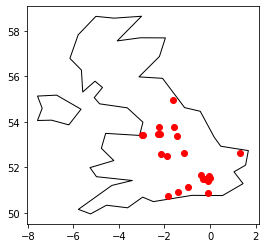

In [6]:
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# We restrict to South America.
ax = world[world.name == 'United Kingdom'].plot(color='white', edgecolor='black')
# We can now plot our ``GeoDataFrame``.
GDF.plot(ax=ax, color='red', figsize = (10, 20))
plt.show()

In [7]:
import geopandas as gpd
import fiona

fiona.supported_drivers['KML'] = 'rw'
# gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
GDF.to_file('raw/test.kml', driver='KML')


In [8]:
def get_local_authority_from_address(address, local_authorities):
    if 'Greater London' in address:
        return "London"
    
    L = []
    for i in local_authorities:
        if i in address:
            return i
        
        
def get_local_authority_candidates_from_address(address, local_authorities):
    
    if 'Greater London' in address:
        return "London"
    
    L = []
    for i in local_authorities:
        if i in address:
            # return i
            L.append(i)
    if len(L) == 1:
        return L[0]
    if len(L) > 1:
        return L

In [9]:
GDF['city'] = GDF['address'].apply(lambda x: get_local_authority_from_address(x, local_authorities))
GDF['city_candidates'] = GDF['address'].apply(lambda x: get_local_authority_candidates_from_address(x, local_authorities))
GDF.to_csv('data/STADIUM_TABLE.csv', index = False)
GDF.to_clipboard()
GDF

,name,address,Latitude,Longitude,geometry,city,city_candidates
0,Amex Stadium,"American Express Community Stadium, Village Wa...",50.861550,-0.084868,POINT (-0.08487 50.86155),Brighton and Hove,Brighton and Hove
1,Anfield Stadium,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.960910,POINT (-2.96091 53.43084),Liverpool,Liverpool
2,Bramall Lane Stadium,"Bramall Lane Stadium, Bramall Lane, Highfield,...",53.370321,-1.470741,POINT (-1.47074 53.37032),Sheffield,"[Sheffield, York]"
3,Brentford Community Stadium,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.288980,POINT (-0.28898 51.49071),London,London
4,Carrow Road Stadium,"Carrow Road Stadium, Koblenz Avenue, Lakenham,...",52.621983,1.309204,POINT (1.30920 52.62198),Norfolk,"[Norfolk, Norwich]"
5,Craven Cottage Stadium,"Craven Cottage, Stevenage Road, London Borough...",51.474949,-0.221794,POINT (-0.22179 51.47495),London,London
6,Elland Road Stadium,"Elland Road Stadium, Elland Road, Beeston, Lee...",53.777898,-1.572127,POINT (-1.57213 53.77790),Leeds,"[Leeds, York]"
7,Emirates Stadium,"Emirates Stadium, 75, Drayton Park, Finsbury P...",51.555040,-0.108400,POINT (-0.10840 51.55504),London,London
8,Etihad Stadium,"Etihad Stadium, Joe Mercer Way, Beswick, Manch...",53.483091,-2.200252,POINT (-2.20025 53.48309),Manchester,Manchester
9,Goodison Park,"Goodison Park, Goodison Road, Walton, Liverpoo...",53.438719,-2.966454,POINT (-2.96645 53.43872),Liverpool,Liverpool


# TEAM

In [10]:
TeamList = list(pd.concat([DF['teamA'], DF['teamB']]).unique())
S_Team = pd.Series(TeamList)
S_Team.to_clipboard()
S_Team

0     Liverpool
1      West Ham
2       Watford
3      C Palace
4       Burnley
5     Tottenham
6     Newcastle
7     Leicester
8       Man Utd
9       Arsenal
10       So'ton
11      A Villa
12      Norwich
13      Everton
14     Brighton
15     Man City
16       Wolves
17      B'mouth
18    Sheff Utd
19      Chelsea
20       Fulham
21        Leeds
22       W Brom
23    Brentford
dtype: object

# CITY LIST

In [13]:
CITY_TABLE = pd.Series(list(GDF['city'].unique()))
CITY_TABLE.to_clipboard()

In [14]:
CITY_TABLE.to_list()

['Brighton and Hove',
 'Liverpool',
 'Sheffield',
 'London',
 'Norfolk',
 'Leeds',
 'Manchester',
 'East Hampshire',
 'Leicester',
 'Wolverhampton',
 'Newcastle upon Tyne',
 'Southampton',
 'Burnley',
 'Hertfordshire',
 'Birmingham',
 'Bournemouth, Christchurch and Poole']